Question 1 · Programmatically download and load into your favorite analytical tool the trip data for September 2015.Report how many rows and columns of data you have loaded.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('green.csv')

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
df.shape

(1494926, 21)

Answer 1. 1494926 rows and 21 columns

Question 2 Plot a histogram of the number of the trip distance ("Trip Distance").  Report any structure you find and any hypotheses you have about that structure.

In [5]:
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [7]:
df['Trip_distance'].head()

0    0.00
1    0.00
2    0.59
3    0.74
4    0.61
Name: Trip_distance, dtype: float64

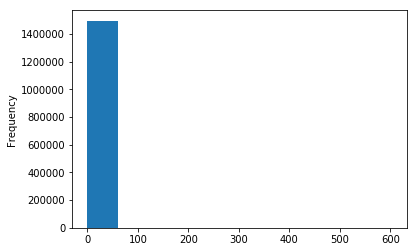

In [8]:
df.Trip_distance.plot(kind='hist')

In [9]:
df.Trip_distance.value_counts().head()

0.0    20592
1.0    16735
0.9    16699
0.8    16152
1.1    16070
Name: Trip_distance, dtype: int64

In [10]:
df.Trip_distance.describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

In [11]:
df.Trip_distance.min()

0.0

In [12]:
df.Trip_distance.max()

603.1

In [13]:
df.Trip_distance.median()

1.98

In [14]:
td=df[df.Trip_distance<=20]

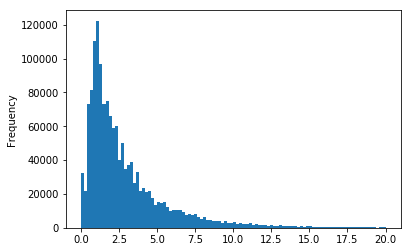

In [15]:
td.Trip_distance.plot(kind='hist',bins=100) #bins

Question 3 · Report mean and median trip distance grouped by hour of day. · We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [16]:
from datetime import datetime
import numpy as np

In [17]:
df['pickup'] = df['lpep_pickup_datetime']
df['pickup'].head()

0    2015-09-01 00:02:34
1    2015-09-01 00:04:20
2    2015-09-01 00:01:50
3    2015-09-01 00:02:36
4    2015-09-01 00:00:14
Name: pickup, dtype: object

In [18]:
df['pickup'] = df['lpep_pickup_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['pickup'].head()

0   2015-09-01 00:02:34
1   2015-09-01 00:04:20
2   2015-09-01 00:01:50
3   2015-09-01 00:02:36
4   2015-09-01 00:00:14
Name: pickup, dtype: datetime64[ns]

In [ ]:
df['pickup_hour'] = df['pickup'].apply(lambda x: x.hour)


In [36]:
df['dropoff'] = df['Lpep_dropoff_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff'].head()
df['dropoff_hour'] = df['dropoff'].apply(lambda x: x.hour)


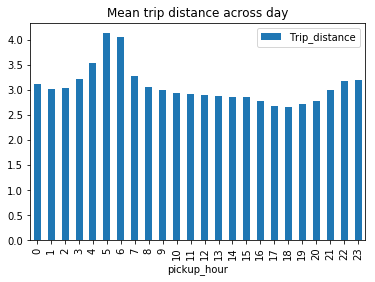

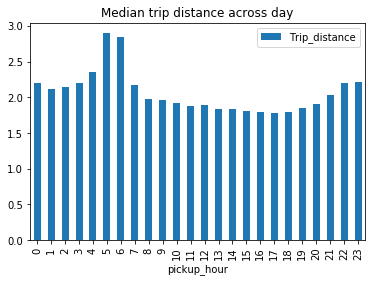

In [21]:
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean trip distance across day')
plt.show()
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median trip distance across day')
plt.show()

In [22]:
def which_nyairport(row):
    if (
        ((row['Pickup_longitude'] < -73.750296) & (row['Pickup_longitude'] > -73.821884) &
       (row['Pickup_latitude'] < 40.666467) & (row['Pickup_latitude']>40.646677)) | 
        (
       (row['Dropoff_longitude'] < -73.750296) & (row['Dropoff_longitude'] > -73.821884) &
       (row['Dropoff_latitude'] < 40.666467) & (row['Dropoff_latitude']>40.646677)) ):
        
        return 'JFK'
    if (
        ((row['Pickup_longitude'] < -73.865387) & (row['Pickup_longitude'] > -73.884547) &
       (row['Pickup_latitude'] < 40.773098) & (row['Pickup_latitude']>40.767550)) | 
        (
       (row['Dropoff_longitude'] < -73.865387) & (row['Dropoff_longitude'] > -73.884547) &
       (row['Dropoff_latitude'] < 40.773098) & (row['Dropoff_latitude']>40.767550)) ):
        
        return 'LAG'
    else:
        return 'NOT'

In [27]:
df['Airport'] = df.apply(which_nyairport, axis=1)

In [28]:
df['Airport'].value_counts() 

NOT    1485010
LAG       5216
JFK       4700
Name: Airport, dtype: int64

In [29]:
print('average fair for airport trips',df[df['Airport']!= 'NOT']['Fare_amount'].mean()) 
print('number of trips satisfying the criteria:',df[df['Airport']!='NOT']['Fare_amount'].shape[0])

average fair for airport trips 26.628824122630096
number of trips satisfying the criteria: 9916


In [30]:
print('average fair for non-airport trips',df[df['Airport']=='NOT']['Fare_amount'].mean())

average fair for non-airport trips 12.449142207796637


Question 4 · Build a derived variable for tip as a percentage of the total fare. · Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.



In [37]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'Airport'],
      dtype='object')

In [38]:
df['tip_percent'] = df['Tip_amount']/df['Total_amount'] 
df['tip_percent'] = df['tip_percent'].apply(lambda x: x * 100) 

In [40]:
import seaborn as sns

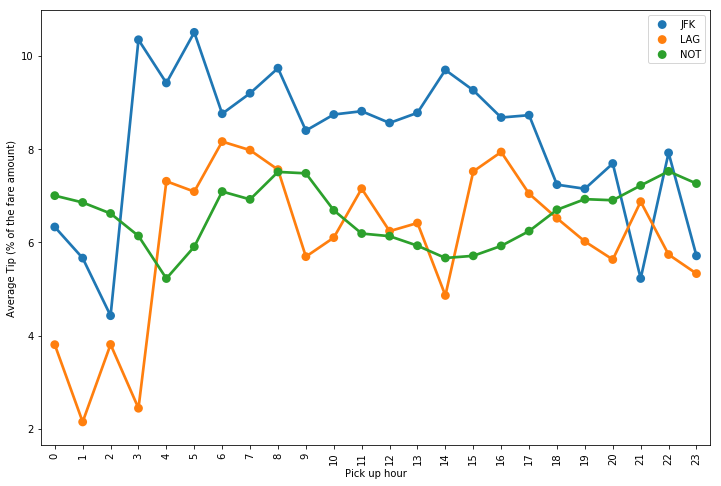

In [41]:
grouped_df = df.groupby(['pickup_hour', 'Airport'])['tip_percent'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.pickup_hour.values, grouped_df.tip_percent.values, grouped_df.Airport.values, alpha=0.8)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()

Question 5

Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

Option A: Distributions
o    Build a derived variable representing the average speed over the course of a trip.
o    Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?
o    Can you build up a hypothesis of average trip speed as a function of time of day?

In [56]:
df['trip_time'] = (df['dropoff'] - df['pickup']).apply(lambda x: x.total_seconds())
df = df[df['trip_time'] > 60]

In [57]:
df['average_speed'] = 3600*(df['Trip_distance']/df['trip_time'])
df['average_speed'].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2    13.792208
3    10.829268
4     8.926829
5    13.708185
6    17.275168
Name: average_speed, dtype: float64

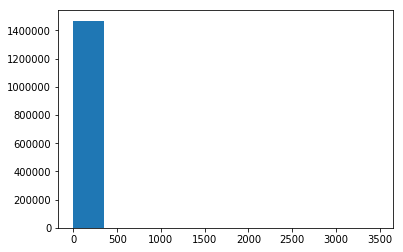

In [58]:
plt.hist(df['average_speed'])
plt.show()

In [60]:
df['week'] = df['dropoff'].apply(lambda x: x.week)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
week_1 = df['average_speed'][df['week']==36].as_matrix()
week_2 = df['average_speed'][df['week']==37].as_matrix()
week_3 = df['average_speed'][df['week']==38].as_matrix()
week_4 = df['average_speed'][df['week']==39].as_matrix()
week_5 = df['average_speed'][df['week']==40].as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [67]:
print(week_1)

[13.79220779 10.82926829  8.92682927 ... 21.57728707 15.08982036
 14.59459459]
